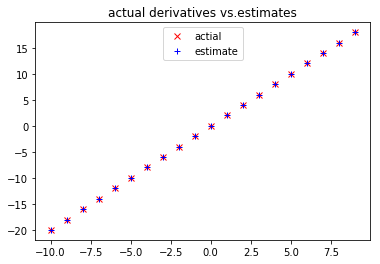

In [9]:
def sum_of_squrs(v):
    return sum([vi ** 2 for vi in v])

def difference_q(f,x,h):
    return (f(x+h)- f(x))/h

def square(x):
    return x*x

def derivative(x):
    return 2*x

from functools import partial

der_estimate = partial(difference_q,square,h = 0.000001)

%matplotlib inline
import matplotlib.pyplot as plt

x = range(-10,10)
plt.title("actual derivatives vs.estimates")
plt.plot(x,list(map(derivative,x)),"rx",label = "actial")
plt.plot(x , list(map(der_estimate,x)),"b+",label = "estimate")
plt.legend(loc = 9)
plt.show()

In [10]:
def partial_diff_quot(f,v,i,h):
    w = []
    for v,vj in enumerete(v):
        if j == i:
            w.append(vj + h)
        else :
            w.append(vj)
    return (f(w) - f(v))/h
    
def est_grad(f,v, h = 0.00001):
    return [partial_deff_quot(f,v,i,h) for i , _ in enumerate(v)]

def step(v, direction,step_size):
    return [vi + step_size * directioni for vi , directioni in zip(v,direction)]

def sum_of_sqrt_grad(v):
    return [2 * vi for vi in v]

import random
import math

def distance(v,w):
    return math.sqrt(sum([(vi-wi)**2 for vi ,wi in zip(v,w)]))

v = [random.randint(-10,10) for _ in range(3)]
tole = 0.000000000001
while True:
    grad = sum_of_sqrt_grad(v)
    nextv = step(v , grad ,-0.01)
    if distance(nextv,v)< tole:
        break

    v = nextv
print(distance)
print([int(vi) for vi in v])

<function distance at 0x00000181B444B158>
[0, 0, 0]


In [17]:
step_size = [10**i for i in range(-5,2)]
def safe(f):
    def safe_f(*args,**kwargs):
        try:
            return f(*args,**kwargs)
        except:
            return float("inf")
    return safe_f

def min_batch(ta_fn , grad_fn ,theta0 , tole = 0.000001):
    step_size = [10 ** i for i in range(-5 ,2)]
    theta = theta0
    ta_fn = safe(ta_fn)
    value = ta_fn(theta)
    for step_size in step_size:
        while True:
            grad = grad_fn(theta)
            next_thetas = step(theta,grad,-step_size) 
            next_value = ta_fn(next_thetas)
#             print(next_thetas,next_value)

            if abs(value - next_value) < tole:
                return print(theta)
            else:
                theta, value = next_thetas,next_value

theta0 = [random.randint(-10,10) for i in range(3)]

def deri(x):
    return 2 *x

def squrs(x):
    return x**2 

min_batch(sum_of_squrs , sum_of_sqrt_grad, theta0)

[0.14704179347571472, 0.01838022418446434, -0.05514067255339328]


In [18]:
def in_random_order(data):
    indexes = [i for  i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

import numpy as np
def min_stochastic(target_f,grad_f,x,y,theta0,alpha0=0.01):
    
    data = zip(x,y)
    theta = theta0
    alpha = alpha0
    min_theta , min_value = None,float("inf")
    iter_no = 0
    
    while iter_no < 100:
        value = sum([target_f(xi , yi ,theta) for xi,yi in data])
        
        if value < min_value:
            min_theta ,min_value = theta , value
            iter_no = 0
            alpha = alpha0
        else:
            iter_no += 1
            alpha *= 0.9
            
        for xi ,yi in in_random_order(data):
            gradi = grad_f(xi,yi,theta)
            nptheta = np.array(theta)
            npgradi = np.array(gradi)
            npthetatheta =  nptheta - (gradi * alpha)
            theta = np.tolist(theta)
            
        
    return print(min_theta)